# **Mobile Phone Prices in Kenya**
For information about this dataset especially about collection see my repository about it [here.](https://github.com/lyraxvincent/phones-priceinkenya)

In [1]:
# Necessary Imports
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("/home/lyrax/matplotlib-dracula/dracula.mplstyle")
import seaborn as sns
sns.set_palette("bright")

from tqdm import tqdm, trange
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("phonesdata.csv")
data

,Phone Title,Specs,Price(Kshs),Rating,Specs Score,Likes,PriceJumia(Kshs)
0,Gionee M7 Power,"Screen:6.0 inches, 720 x 1440 pixels,Front Cam...",NaN,4.0,56%,13,"KSh 15,880"
1,Gionee M7,"Screen:6.01 inches, 1080 x 2160 pixels,Front C...",NaN,4.5,69%,8,"KSh 15,880"
2,Samsung Galaxy M21 6GB/128GB,"Screen:6.4 inches, 1080 x 2340 pixels,Front Ca...",NaN,4.3,100%,30,"KSh 21,590"
3,Samsung Galaxy M21 4GB/64GB,"Screen:6.4 inches, 1080 x 2340 pixels,Front Ca...","22,499",3.8,94%,31,"KSh 21,590"
4,Samsung Galaxy A31 6GB/128GB,"Screen:6.4 inches, 1080 x 2400 pixels,Front Ca...","24,999",3.8,98%,31,"KSh 24,399"
...,...,...,...,...,...,...,...
1143,Nokia 105 (2019),"Screen:1.77 inches, 120 x 160 pixels,Front Cam...","1,900",3.0,8%,11,NaN
1144,Nokia 220 4G,"Screen:2.4 inches, 240 x 320 pixels,Front Came...",NaN,4.0,11%,8,NaN
1145,Nokia X71,"Screen:6.39 inches, 1080 x 2316 pixels,Front C...",NaN,3.0,93%,53,NaN
1146,Nokia 2.2 3GB/32GB,"Screen:5.71 inches, 720 x 1520 pixels,Front Ca...",NaN,3.4,47%,50,NaN


In [3]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148 entries, 0 to 1147
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Phone Title       1148 non-null   object 
 1   Specs             1148 non-null   object 
 2   Price(Kshs)       357 non-null    object 
 3   Rating            1148 non-null   float64
 4   Specs Score       1148 non-null   object 
 5   Likes             1148 non-null   int64  
 6   PriceJumia(Kshs)  1003 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 62.9+ KB


In [4]:
# We'll use the PriceJumia column as the price column since it has few missing entries
# Price column is the only with missing values so we may drop these few instances
data['Price(Kshs)'] = data['PriceJumia(Kshs)']
data.drop('PriceJumia(Kshs)', axis=1, inplace=True)
data.dropna(inplace=True); data.reset_index(drop=True, inplace=True)

## **Data Preprocessing**
We design a function to preprocess the data into a reliable form. We design individual features from specs column and clean other features.

In [5]:
def preprocess(df):
    # screen inches column
    df['screen_inches'] = df.Specs.apply(lambda spec: float(spec.split(',')[0].split()[0].split(':')[1]))
    
    # pixels column
    df['pixels'] = df.Specs.apply(lambda spec: spec.split(',')[1].partition('pixels')[0])
    df['pixels_0'] = df.pixels.apply(lambda pix: int(pix.split()[0]))
    df['pixels_1'] = df.pixels.apply(lambda pix: int(pix.split()[-1]))
    
    # front cam
    df['front_cam(MP)'] =  df.Specs.apply(lambda spec: spec.split(',')[2].partition('Front Camera:')[2].split('MP')[0])
    
    # android
    df['android'] = np.nan
    for i, _ in enumerate(df.Specs):
        try:
            df.loc[i, 'android'] = df.loc[i, 'Specs'].split(',')[3].split()[1]
        except IndexError:
            pass
    df.android = df.android.apply(lambda s: str(s).split('.')[0])
    df.android = df.android.str.replace(';','')
    for i, _ in enumerate(df.android):
        try:
            df.loc[i, 'android'] = float(df.loc[i, 'android'])
        except ValueError:
            df.loc[i, 'android'] = np.nan
        
    # storage
    df['storage(GB)'] = df.Specs.apply(lambda spec: spec.split(',')[4].partition('Storage:')[-1].split('GB')[0])
    
    # ram 
    df['ram(GB)'] = df.Specs.apply(lambda spec: spec.split(',')[5].partition('RAM:')[-1].split('GB')[0])
    
    # battery
    df['battery(mAh)'] = df.Specs.apply(lambda spec: spec.split(',')[6].partition('Battery:')[-1].split('mAh')[0])
    

    # Clean Other columns
    df['Price(Kshs)'] = df['Price(Kshs)'].apply(lambda pr: str(pr.split()[1])).str.replace(',', '').astype(int)
    df['Specs Score(%)'] = df['Specs Score'].str.replace('%', '').astype(int); df.drop('Specs Score', axis=1, inplace=True)
    

# Applying the function 
preprocess(data)
data

,Phone Title,Specs,Price(Kshs),Rating,Likes,screen_inches,pixels,pixels_0,pixels_1,front_cam(MP),android,storage(GB),ram(GB),battery(mAh),Specs Score(%)
0,Gionee M7 Power,"Screen:6.0 inches, 720 x 1440 pixels,Front Cam...",15880,4.0,13,6.00,720 x 1440,720,1440,8,7.0,64,4,4000,56
1,Gionee M7,"Screen:6.01 inches, 1080 x 2160 pixels,Front C...",15880,4.5,8,6.01,1080 x 2160,1080,2160,8,7.0,64,6,4000,69
2,Samsung Galaxy M21 6GB/128GB,"Screen:6.4 inches, 1080 x 2340 pixels,Front Ca...",21590,4.3,30,6.40,1080 x 2340,1080,2340,20,10.0,128,6,6000,100
3,Samsung Galaxy M21 4GB/64GB,"Screen:6.4 inches, 1080 x 2340 pixels,Front Ca...",21590,3.8,31,6.40,1080 x 2340,1080,2340,20,10.0,64,4,6000,94
4,Samsung Galaxy A31 6GB/128GB,"Screen:6.4 inches, 1080 x 2400 pixels,Front Ca...",24399,3.8,31,6.40,1080 x 2400,1080,2400,20,10.0,128,6,5000,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,BlackBerry Priv,"Screen:5.4 inches, 1440 x 2560 pixels,Front Ca...",10999,4.1,14,5.40,1440 x 2560,1440,2560,2,5.0,32,3,3410,58
999,BlackBerry Aurora,"Screen:5.5 inches, 720 x 1280 pixels,Front Cam...",1799,2.5,7,5.50,720 x 1280,720,1280,8,7.0,32,4,3000,45
1000,BlackBerry Keyone 64 GB,"Screen:4.5 inches, 1080 x 1620 pixels,Front Ca...",399,4.2,10,4.50,1080 x 1620,1080,1620,8,7.0,64,4,3505,60
1001,BlackBerry Keyone 32 GB,"Screen:4.5 inches, 1080 x 1620 pixels,Front Ca...",9780,2.6,5,4.50,1080 x 1620,1080,1620,8,7.0,32,3,3505,56


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Phone Title     1003 non-null   object 
 1   Specs           1003 non-null   object 
 2   Price(Kshs)     1003 non-null   int64  
 3   Rating          1003 non-null   float64
 4   Likes           1003 non-null   int64  
 5   screen_inches   1003 non-null   float64
 6   pixels          1003 non-null   object 
 7   pixels_0        1003 non-null   int64  
 8   pixels_1        1003 non-null   int64  
 9   front_cam(MP)   1003 non-null   object 
 10  android         873 non-null    object 
 11  storage(GB)     1003 non-null   object 
 12  ram(GB)         1003 non-null   object 
 13  battery(mAh)    1003 non-null   object 
 14  Specs Score(%)  1003 non-null   int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 117.7+ KB


In [7]:
# drop instances without android version
data.dropna(inplace=True); data.reset_index(drop=True, inplace=True)
data

,Phone Title,Specs,Price(Kshs),Rating,Likes,screen_inches,pixels,pixels_0,pixels_1,front_cam(MP),android,storage(GB),ram(GB),battery(mAh),Specs Score(%)
0,Gionee M7 Power,"Screen:6.0 inches, 720 x 1440 pixels,Front Cam...",15880,4.0,13,6.00,720 x 1440,720,1440,8,7.0,64,4,4000,56
1,Gionee M7,"Screen:6.01 inches, 1080 x 2160 pixels,Front C...",15880,4.5,8,6.01,1080 x 2160,1080,2160,8,7.0,64,6,4000,69
2,Samsung Galaxy M21 6GB/128GB,"Screen:6.4 inches, 1080 x 2340 pixels,Front Ca...",21590,4.3,30,6.40,1080 x 2340,1080,2340,20,10.0,128,6,6000,100
3,Samsung Galaxy M21 4GB/64GB,"Screen:6.4 inches, 1080 x 2340 pixels,Front Ca...",21590,3.8,31,6.40,1080 x 2340,1080,2340,20,10.0,64,4,6000,94
4,Samsung Galaxy A31 6GB/128GB,"Screen:6.4 inches, 1080 x 2400 pixels,Front Ca...",24399,3.8,31,6.40,1080 x 2400,1080,2400,20,10.0,128,6,5000,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,BlackBerry Priv,"Screen:5.4 inches, 1440 x 2560 pixels,Front Ca...",10999,4.1,14,5.40,1440 x 2560,1440,2560,2,5.0,32,3,3410,58
869,BlackBerry Aurora,"Screen:5.5 inches, 720 x 1280 pixels,Front Cam...",1799,2.5,7,5.50,720 x 1280,720,1280,8,7.0,32,4,3000,45
870,BlackBerry Keyone 64 GB,"Screen:4.5 inches, 1080 x 1620 pixels,Front Ca...",399,4.2,10,4.50,1080 x 1620,1080,1620,8,7.0,64,4,3505,60
871,BlackBerry Keyone 32 GB,"Screen:4.5 inches, 1080 x 1620 pixels,Front Ca...",9780,2.6,5,4.50,1080 x 1620,1080,1620,8,7.0,32,3,3505,56


**Price distribution:**

<AxesSubplot:xlabel='Price(Kshs)', ylabel='Density'>

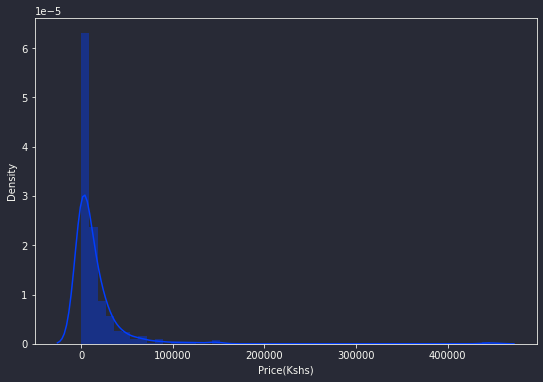

In [12]:
plt.figure(figsize=(9,6))
sns.distplot(data['Price(Kshs)'])

This distribution shows some discrepancies. Let's inspect the minimum and maximum phone prices:

In [16]:
print(f"Minimum price: {data['Price(Kshs)'].min()} KShs.\nMaximum price: {data['Price(Kshs)'].max()} KShs.")

Minimum price: 124 KShs.
Maximum price: 446342 KShs.


These prices are unreasonable, clipping the prices to range between 4000Kshs and 150000Kshs:

In [20]:
data_clipped = data[data['Price(Kshs)'] == np.clip(data['Price(Kshs)'], 4000, 150000)]
data_clipped

,Phone Title,Specs,Price(Kshs),Rating,Likes,screen_inches,pixels,pixels_0,pixels_1,front_cam(MP),android,storage(GB),ram(GB),battery(mAh),Specs Score(%)
0,Gionee M7 Power,"Screen:6.0 inches, 720 x 1440 pixels,Front Cam...",15880,4.0,13,6.00,720 x 1440,720,1440,8,7.0,64,4,4000,56
1,Gionee M7,"Screen:6.01 inches, 1080 x 2160 pixels,Front C...",15880,4.5,8,6.01,1080 x 2160,1080,2160,8,7.0,64,6,4000,69
2,Samsung Galaxy M21 6GB/128GB,"Screen:6.4 inches, 1080 x 2340 pixels,Front Ca...",21590,4.3,30,6.40,1080 x 2340,1080,2340,20,10.0,128,6,6000,100
3,Samsung Galaxy M21 4GB/64GB,"Screen:6.4 inches, 1080 x 2340 pixels,Front Ca...",21590,3.8,31,6.40,1080 x 2340,1080,2340,20,10.0,64,4,6000,94
4,Samsung Galaxy A31 6GB/128GB,"Screen:6.4 inches, 1080 x 2400 pixels,Front Ca...",24399,3.8,31,6.40,1080 x 2400,1080,2400,20,10.0,128,6,5000,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,BlackBerry Keyone Black Edition,"Screen:4.5 inches, 1080 x 1620 pixels,Front Ca...",31999,3.7,6,4.50,1080 x 1620,1080,1620,8,7.0,64,4,3505,60
867,BlackBerry Motion,"Screen:5.5 inches, 1080 x 1920 pixels,Front Ca...",10999,4.5,23,5.50,1080 x 1920,1080,1920,8,7.0,32,4,4000,59
868,BlackBerry Priv,"Screen:5.4 inches, 1440 x 2560 pixels,Front Ca...",10999,4.1,14,5.40,1440 x 2560,1440,2560,2,5.0,32,3,3410,58
871,BlackBerry Keyone 32 GB,"Screen:4.5 inches, 1080 x 1620 pixels,Front Ca...",9780,2.6,5,4.50,1080 x 1620,1080,1620,8,7.0,32,3,3505,56


<AxesSubplot:xlabel='Price(Kshs)', ylabel='Density'>

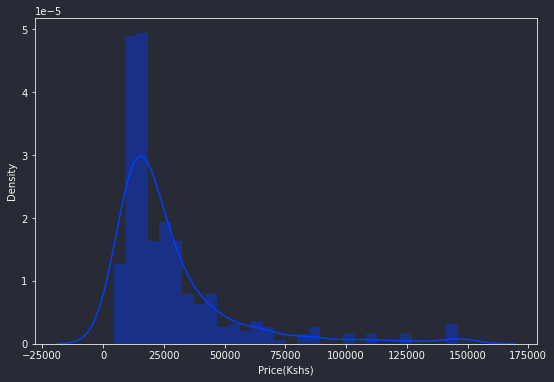

In [21]:
# replotting price distribution
plt.figure(figsize=(9,6))
sns.distplot(data_clipped['Price(Kshs)'])

Looks better!

Text(0.5, 1.0, 'Boxplot')

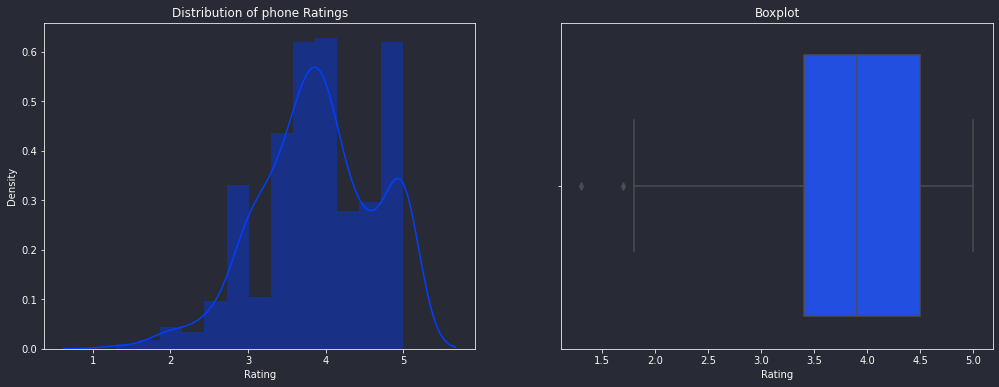

In [35]:
# distribution and boxplot of phone Rating
fig, ax = plt.subplots(1, 2, figsize=(17, 6))
sns.distplot(data_clipped.Rating, ax=ax[0]); ax[0].set_title("Distribution of phone Ratings")
sns.boxplot(data_clipped.Rating, ax=ax[1]); ax[1].set_title("Boxplot")

Most phones were rated an average of 3.5 to 4.5 stars.    

-----

**Relationship between price and rating:**

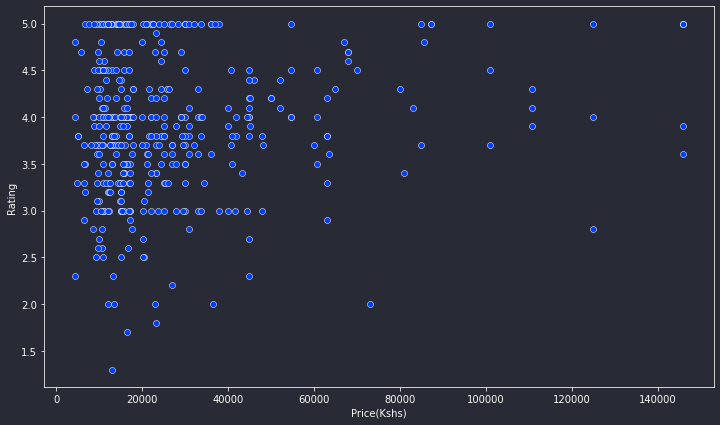

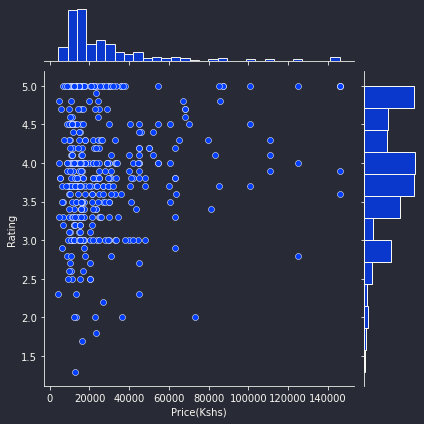

In [60]:
plt.figure(figsize=(12,7))
sns.scatterplot(data_clipped['Price(Kshs)'], data_clipped.Rating)
sns.jointplot(data_clipped['Price(Kshs)'], data_clipped.Rating)

The relationship is non-linear. However, there are some interesting trends in the 3, 4 and 5 star ratings, notice the horizontal lines in these ratings.  
This shows that keeping price constant, many phones were rated an average of 3, 4 and 5 star rating.  
The affordable the phone, the more the ratings as people are able to buy and experience it, hence the more points in the LHS of our plot.  

-----

**Relationship between rating and likes:**

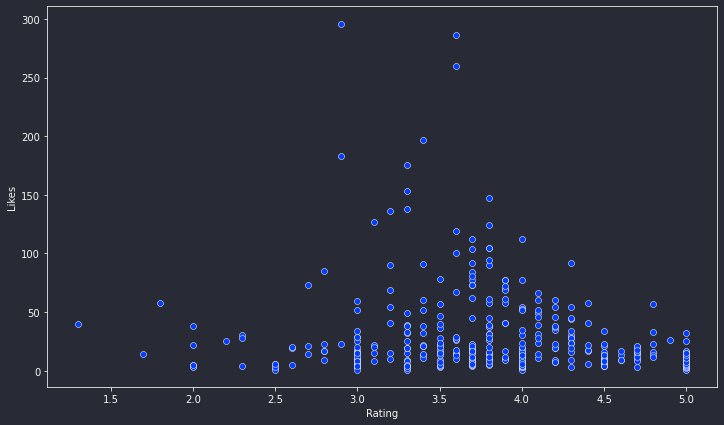

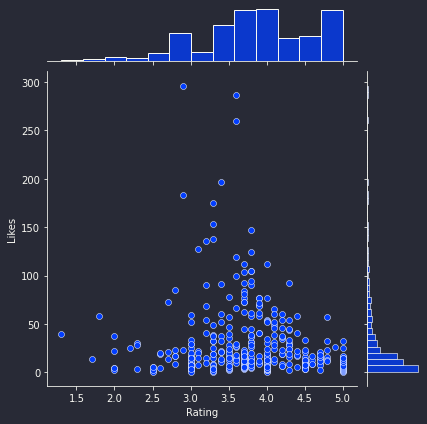

In [61]:
plt.figure(figsize=(12,7))
sns.scatterplot(data_clipped.Rating, data_clipped.Likes)
sns.jointplot(data_clipped.Rating, data_clipped.Likes)

The people that rated phones(as seen in the ratings boxplot) are the most who also gave likes.  

-----

**Counts of phones with screen inches among the 52 unique inches available:**

<AxesSubplot:xlabel='count', ylabel='screen_inches'>

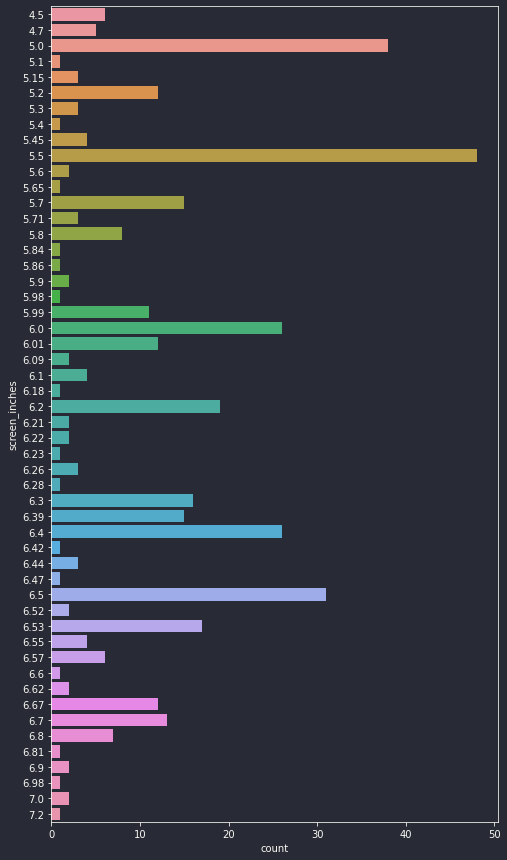

In [66]:
plt.figure(figsize=(8,15))
sns.countplot(y=data_clipped.screen_inches)

Most phones have 5.5 screen inch size, then 5.0, then 6.5 and so on...  

-----  

**Counts of android version:**

<AxesSubplot:xlabel='android', ylabel='count'>

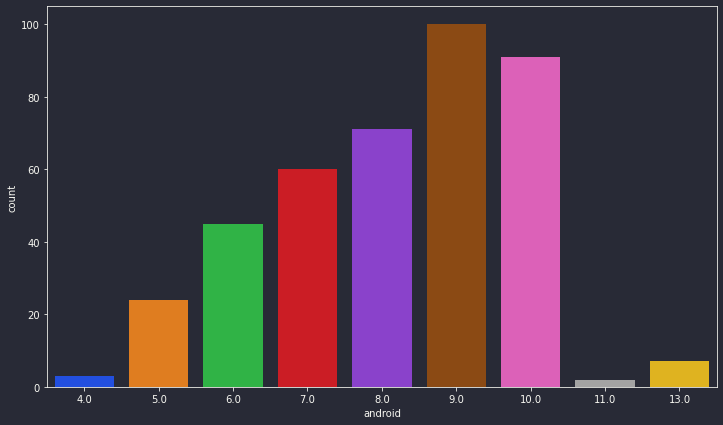

In [68]:
plt.figure(figsize=(12,7))
sns.countplot(data_clipped.android)

Seems to be some outlier data points; during collection of this data there was no android version > 10.0  
Dropping these outliers:

In [70]:
data_clipped = data_clipped[data_clipped.android <= 10]

**Relationship between rating and specs score, likes and specs score:**

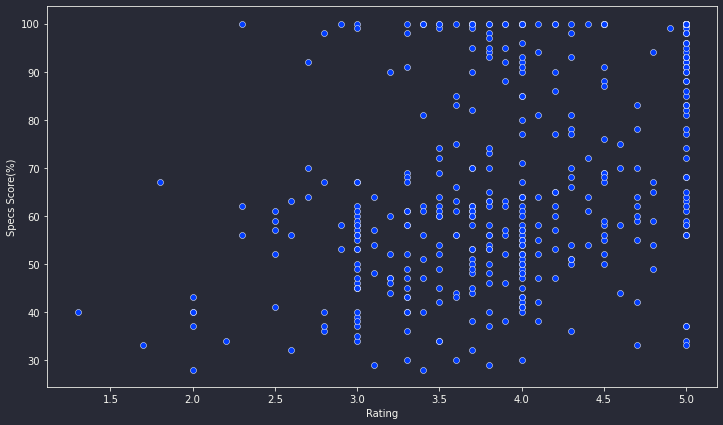

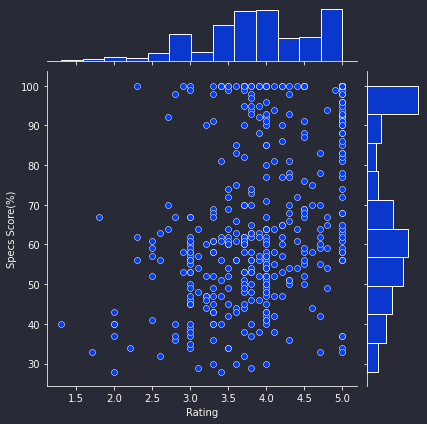

In [91]:
plt.figure(figsize=(12,7))
sns.scatterplot(data_clipped.Rating, data_clipped['Specs Score(%)'])
sns.jointplot(data_clipped.Rating, data_clipped['Specs Score(%)'])

Non-linear, most scored phones were those most rated(3.0 to 4.5 stars).

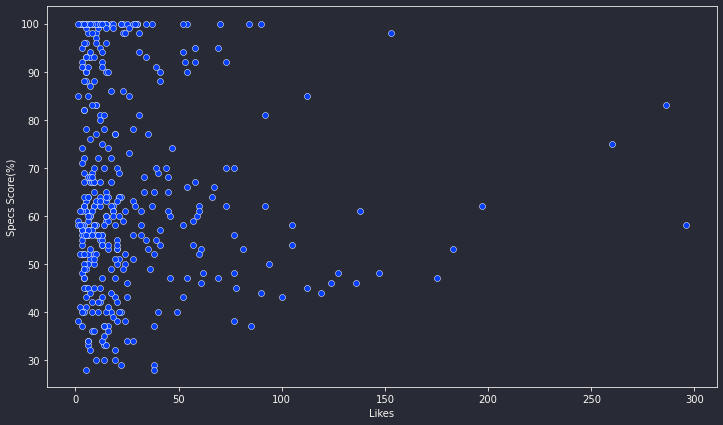

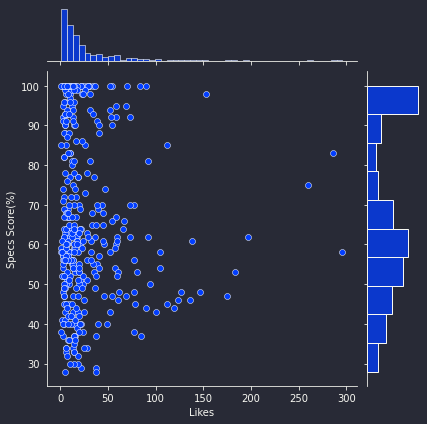

In [92]:
plt.figure(figsize=(12,7))
sns.scatterplot(data_clipped.Likes, data_clipped['Specs Score(%)'])
sns.jointplot(data_clipped.Likes, data_clipped['Specs Score(%)'])

Little to no relationship at all, keeping likes constant, a phone with get scored regardless.